# <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">Kaggle Problem Introduction (Credit Card Fraud Detection)<a>

## <span style="color: #8be9fd">Context</span>

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## <span style="color: #8be9fd">Content</span>

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from dotenv import load_dotenv
load_dotenv()

import os

import sys
sys.path.append(os.environ.get('PROJECT_PATH'))

# <span style="color: #8be9fd">Define Metadata</span>

In [2]:
from datetime import date

target_class_name = 'Class'
labels = ['Non-Fraud', 'Fraud']
input_file_name = 'creditcard.csv'
intermediate_data_path = '../data/intermediate/'
output_df_file_name = 'day1_cleaned_df_output_'
export_date = str(date.today().strftime('%Y%m%d'))

In [3]:
print(os.listdir('../data/raw'))

['creditcard.csv', '.gitkeep']


# <span style="color: #8be9fd">Load Data</span>

In [4]:
df = pd.read_csv(f'../data/raw/{input_file_name}')
print(df.shape)
df.sample(5)

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46517,42818.0,-0.524745,1.543894,-0.116618,0.735187,0.264208,-0.748724,0.812690,-0.015082,0.260426,...,0.054903,0.538515,0.088442,0.038373,-0.681421,-0.367253,0.766320,0.401336,3.76,0
32219,36691.0,1.069204,-0.030309,1.440341,2.878515,-0.773158,0.822097,-0.790313,0.430257,0.689065,...,0.030640,0.410578,-0.080451,0.087772,0.492451,0.247803,0.055162,0.020245,0.00,0
142786,84934.0,1.412410,-1.268863,0.948591,-1.256518,-1.993313,-0.498289,-1.469104,0.070948,-1.355551,...,0.033721,0.480930,0.047677,0.378171,0.206394,-0.034109,0.062499,0.025898,19.99,0
152710,97444.0,-0.776538,-0.673775,1.744029,-0.686797,0.498103,-0.426698,-0.700220,0.300125,1.861253,...,0.023476,-0.019625,0.160522,-0.402799,-0.292995,0.355505,-0.121383,-0.042329,39.00,0
252515,155842.0,2.066601,0.087157,-1.681138,0.451865,0.274481,-0.964245,0.119329,-0.185681,0.640321,...,-0.369366,-1.008775,0.364512,0.610918,-0.306220,0.168638,-0.069226,-0.031545,1.98,0


In [5]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [6]:
df.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# <span style="color: #8be9fd">Data Insights</span>

## <span style="color: #8be9fd">Data Structure</span>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## <span style="color: #8be9fd">Summary Stats</span>

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## <span style="color: #8be9fd">Unique Values Checking</span>

In [9]:
for column in df.columns:
    print(column, len(df[column].unique()))

Time 124592
V1 275663
V2 275663
V3 275663
V4 275663
V5 275663
V6 275663
V7 275663
V8 275663
V9 275663
V10 275663
V11 275663
V12 275663
V13 275663
V14 275663
V15 275663
V16 275663
V17 275663
V18 275663
V19 275663
V20 275663
V21 275663
V22 275663
V23 275663
V24 275663
V25 275663
V26 275663
V27 275663
V28 275663
Amount 32767
Class 2


## <span style="color: #8be9fd">Identifying Bad Columns</span>

In [10]:
from helper_functions_comprehensive import find_bad_columns_function

null_col_list, blank_space_col_list, constant_numeric_col_list, \
constant_non_numeric_col_list, duplicate_col_list = find_bad_columns_function(
    df,
    skip_duplicate_check=True
)

Identified 0 features with atleast one null
Identified 0 features with atleast one blank space
Identified 0 numeric features that have quasi-constant values
Identified 0 non-numeric features that have quasi-constant values


# <span style="color: #8be9fd">Data Cleansing</span>

Skipping this section, because dataset is fairly clean

**Export processed data for further iterations**

In [11]:
import pickle

pickle.dump(df, open(f'{intermediate_data_path}{output_df_file_name}{export_date}.pkl', 'wb'))

# <span style="color: #8be9fd">Modelling Workflow</span>

## <span style="color: #8be9fd">Data Preparation</span>

### <span style="color: #8be9fd"> Normalizing numerical variables </span>

Now that we have numerical features, can we feed it directly into a tree based model like Random Forest? Yes, even without scaling or normalizing. Scaling has the effect of squeezing all data range into a tight range but is not required for Tree-based ML models

### <span style="color: #8be9fd">Feature - Target Split</span>

In [12]:
X = df.drop(target_class_name, axis=1)
Y = df[target_class_name]

### <span style="color: #8be9fd">Train-Test Split</span>

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

### <span style="color: #8be9fd">Estimate of baseline accuracy - Class Distributions</span>

In [14]:
print('Percentage of Negative class is {}%'.format(
    round(df[target_class_name].value_counts()[0]/len(df) * 100, 3)
))
print('Percentage of Positive class is {}%'.format(
    round(df[target_class_name].value_counts()[1]/len(df) * 100, 3)
))

Percentage of Negative class is 99.827%
Percentage of Positive class is 0.173%


0    284315
1       492
Name: Class, dtype: int64

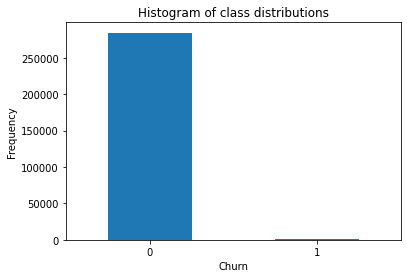

In [15]:
plt.figure(figsize=(6, 4))
pd.value_counts(df[target_class_name]).plot.bar()
plt.title('Histogram of class distributions')
plt.xlabel('Churn')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
df[target_class_name].value_counts()

## <span style="color: #8be9fd">Predictive Modelling</span>

### <span style="color: #8be9fd">ML Model Fitting</span>

In [16]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

### <span style="color: #8be9fd">Model Performance Metrics</span>

Has a Train accuracy of 100.0 % 
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    227451
       Fraud       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

The ROC AUC Score on Train set is 1.0
Confusion matrix, without normalization
[[227451      0]
 [     0    394]]


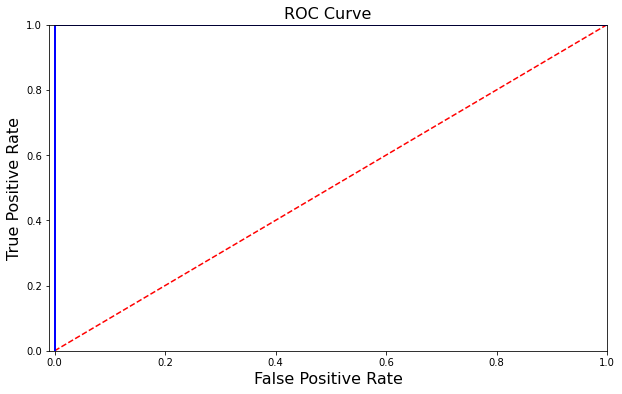

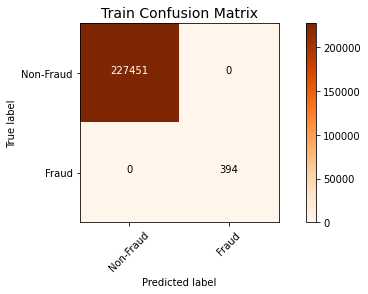

In [17]:
from helper_functions_comprehensive import custom_classification_metrics_function

custom_classification_metrics_function(X_train, Y_train, labels, classifier, data_type='Train')

Has a Test accuracy of 100.0 % 
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

The ROC AUC Score on Test set is 0.96
Confusion matrix, without normalization
[[56859     5]
 [   18    80]]


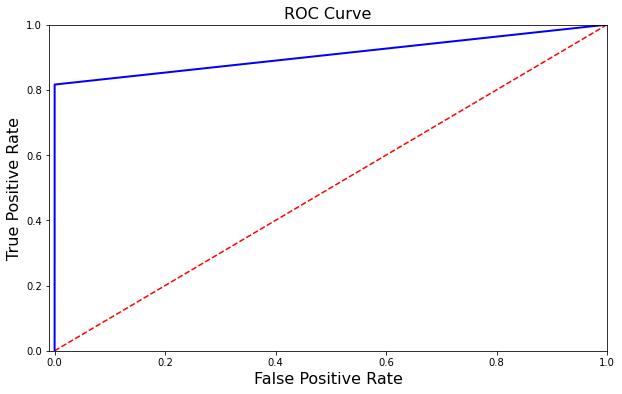

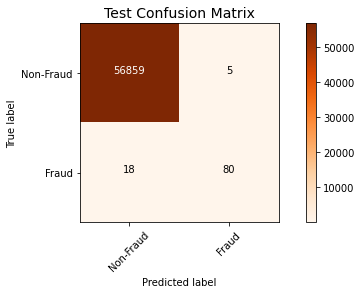

In [18]:
custom_classification_metrics_function(X_test, Y_test, labels, classifier, data_type='Test')

### <span style="color: #8be9fd">Performance Metrics for Imbalanced Datasets</span>

In [19]:
from helper_functions_comprehensive import precision_at_recall_threshold_function

predicted_proba = classifier.predict_proba(X_test)[:,1]
precision_at_recall_threshold_function(Y_test, predicted_proba, recall_threshold=0.85)

0.9333333333333333

### <span style="color: #8be9fd">Visualize Class Separation</span>

In [20]:
%%time

from sklearn.manifold import TSNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

from sklearn.decomposition import PCA, TruncatedSVD
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

X_reduced_svd = TruncatedSVD(
    n_components=2, algorithm='randomized', random_state=42
).fit_transform(X.values)

CPU times: user 2h 17min 52s, sys: 24min 46s, total: 2h 42min 39s
Wall time: 1h 39min 18s


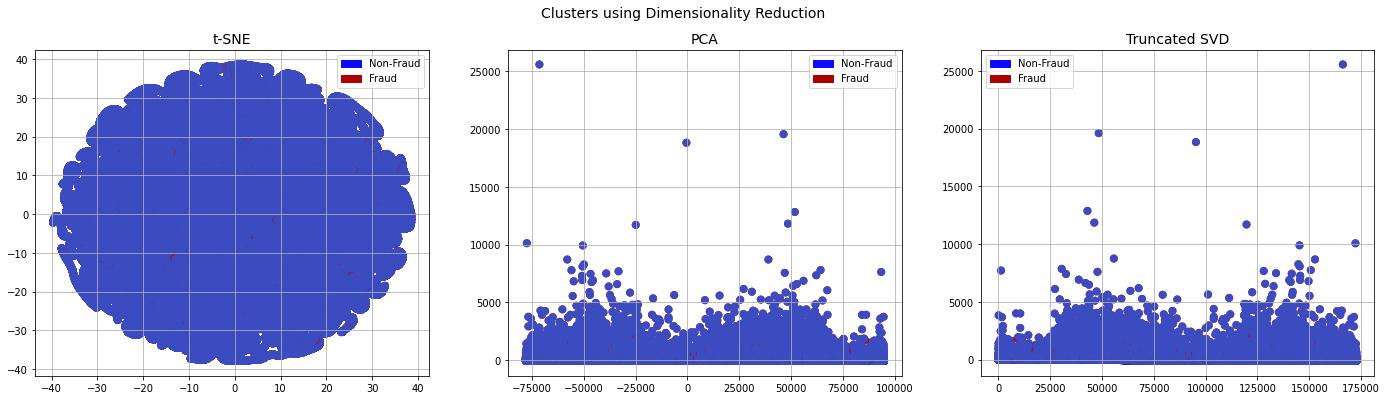

In [24]:
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label=labels[0])
red_patch = mpatches.Patch(color='#AF0000', label=labels[1])

# TSNE scatter plot
ax1.scatter(
    X_reduced_tsne[:,0],
    X_reduced_tsne[:,1],
    c=(Y == 0),
    cmap='coolwarm',
    label=labels[0],
    linewidth=2,
)

ax1.scatter(
    X_reduced_tsne[:,0],
    X_reduced_tsne[:,1],
    c=(Y == 1),
    cmap='coolwarm',
    label=labels[1],
    linewidth=2,
)

ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(
    X_reduced_pca[:,0],
    X_reduced_pca[:,1],
    c=(Y == 0),
    cmap='coolwarm',
    label=labels[0],
    linewidth=2,
)

ax2.scatter(
    X_reduced_pca[:,0],
    X_reduced_pca[:,1],
    c=(Y == 1),
    cmap='coolwarm',
    label=labels[1],
    linewidth=2,
)

ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(
    X_reduced_svd[:,0],
    X_reduced_svd[:,1],
    c=(Y == 0),
    cmap='coolwarm',
    label=labels[0],
    linewidth=2,
)

ax3.scatter(
    X_reduced_svd[:,0],
    X_reduced_svd[:,1],
    c=(Y == 1),
    cmap='coolwarm',
    label=labels[1],
    linewidth=2,
)

ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()